Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [41]:
# Load the bike stations CSV
stations_df = pd.read_csv('london_bike_stations.csv')


# Merge on the station name (adjust column names as needed)
merged_df = pd.merge(yelp_df, stations_df, left_on='station_name', right_on='name', how='left')

# Save to CSV if desired
merged_df.to_csv('yelp_bike_stations_joined.csv', index=False)

# Display the first few rows
print(merged_df.head())

Index(['name', 'latitude', 'longitude', 'free_bikes', 'empty_slots',
       'total_bikes'],
      dtype='object')
                                             name   latitude  longitude  \
0  300073 - Prince of Wales Drive, Battersea Park  51.475154  -0.159170   
1    003447 - Gloucester Road (North), Kensington  51.497925  -0.183835   
2           200213 - Durant Street, Bethnal Green  51.528682  -0.065550   
3            003488 - Charles II Street, West End  51.508446  -0.131961   
4           001126 - North Audley Street, Mayfair  51.512912  -0.153645   

   free_bikes  empty_slots  total_bikes  
0          13            5           18  
1           0           17           17  
2          12            9           21  
3           0           22           22  
4           0           14           14  


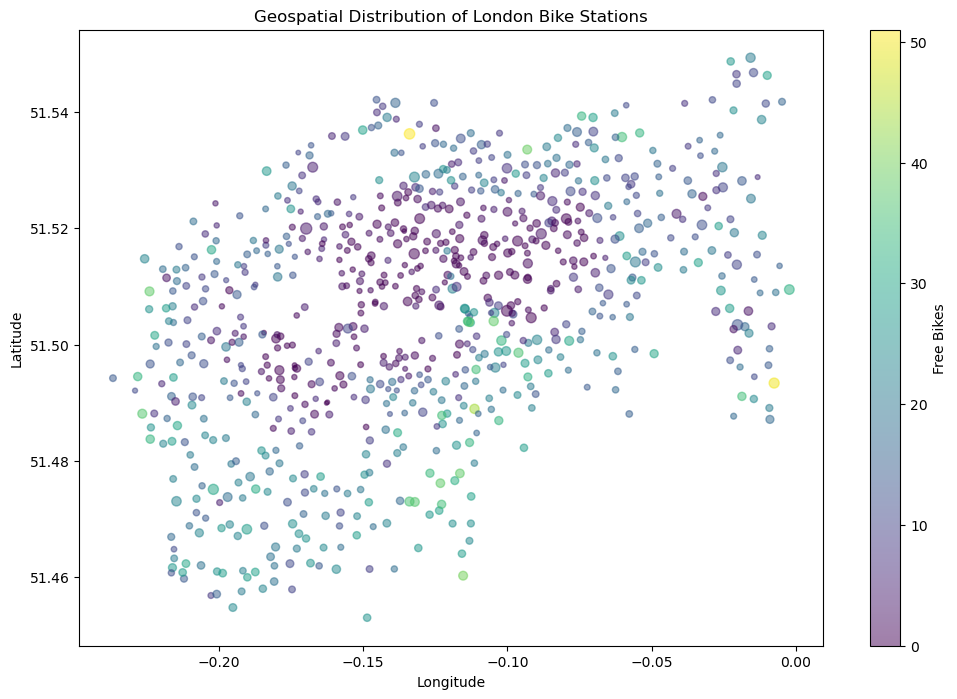

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
stations_df = pd.read_csv("london_bike_stations.csv")

# Scatter plot on a map of London
plt.figure(figsize=(12, 8))
plt.scatter(stations_df['longitude'], stations_df['latitude'], alpha=0.5, s=stations_df['total_docks'], c=stations_df['free_bikes'], cmap='viridis')
plt.colorbar(label='Free Bikes')
plt.title('Geospatial Distribution of London Bike Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()




Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

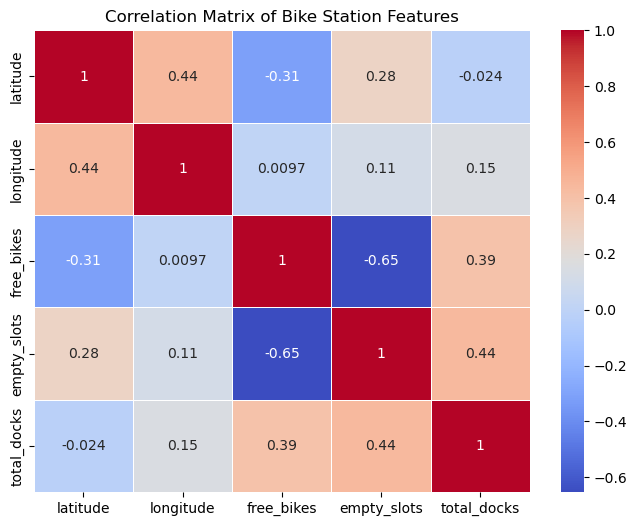

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
stations_df = pd.read_csv("london_bike_stations.csv")

# Create a correlation matrix
correlation_matrix = stations_df[['latitude', 'longitude', 'free_bikes', 'empty_slots', 'total_docks']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Bike Station Features')
plt.show()




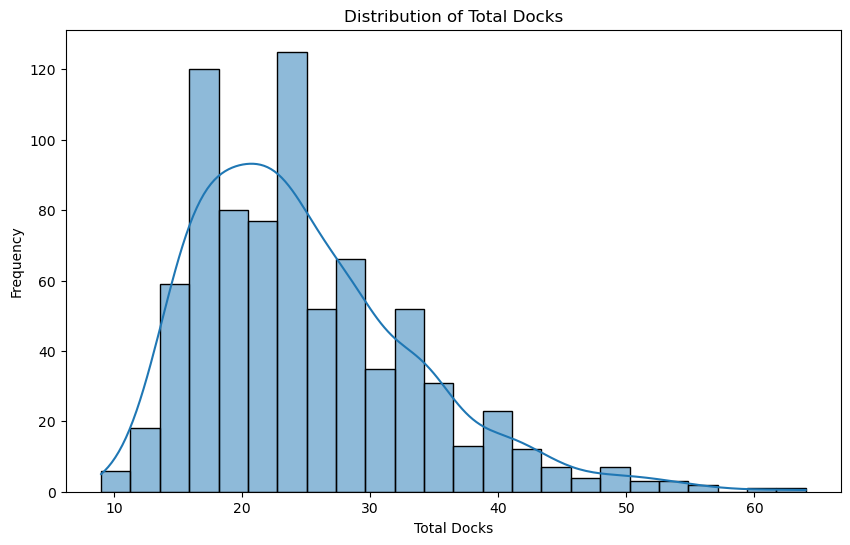

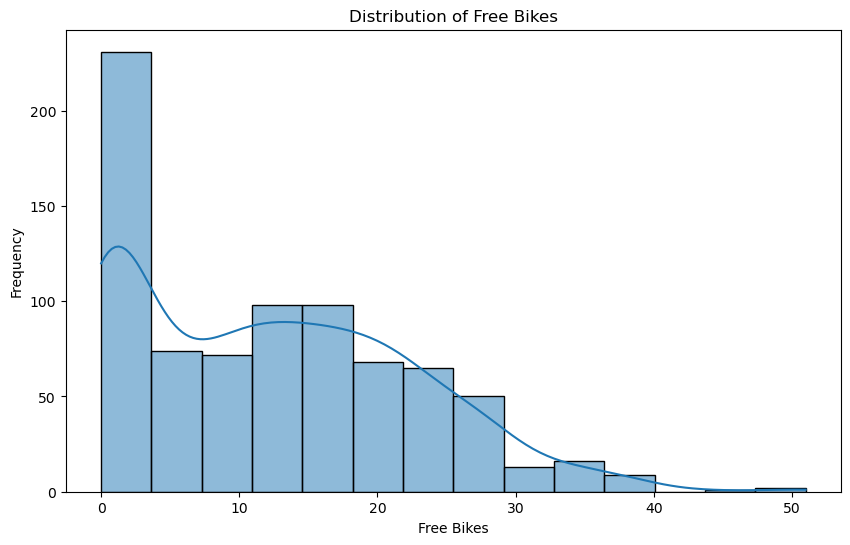

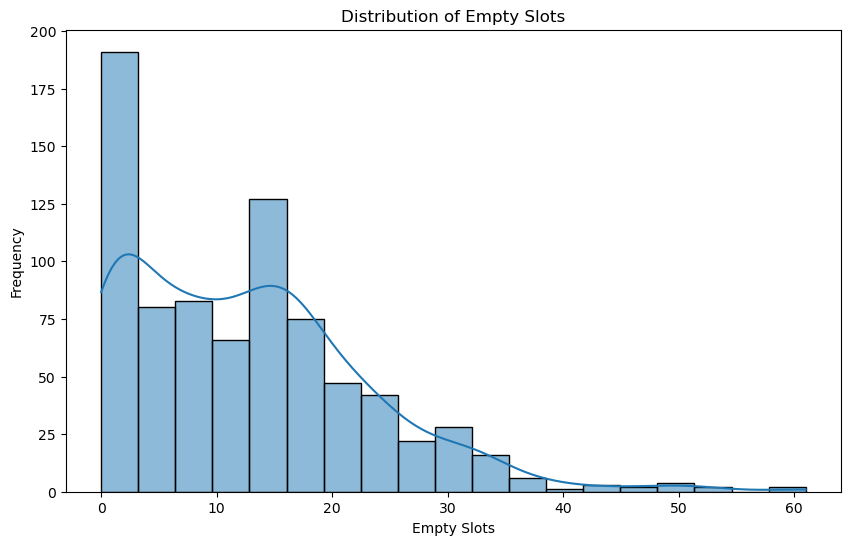

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
stations_df = pd.read_csv("london_bike_stations.csv")

# Distribution of total docks
plt.figure(figsize=(10, 6))
sns.histplot(stations_df['total_docks'], kde=True)
plt.title('Distribution of Total Docks')
plt.xlabel('Total Docks')
plt.ylabel('Frequency')
plt.show()

# Distribution of free bikes
plt.figure(figsize=(10, 6))
sns.histplot(stations_df['free_bikes'], kde=True)
plt.title('Distribution of Free Bikes')
plt.xlabel('Free Bikes')
plt.ylabel('Frequency')
plt.show()

# Distribution of empty slots
plt.figure(figsize=(10, 6))
sns.histplot(stations_df['empty_slots'], kde=True)
plt.title('Distribution of Empty Slots')
plt.xlabel('Empty Slots')
plt.ylabel('Frequency')
plt.show()



# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [39]:
import pandas as pd
import sqlite3
import os

# Load the combined CSV
df = pd.read_csv('yelp_bike_stations_joined.csv')

# Create the 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Define database file path
db_path = 'data/london_bike_stations.db'

# Connect to SQLite database
conn = sqlite3.connect(db_path)

# Write the DataFrame to a SQL table
df.to_sql('bike_station_pois', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print(f"Database created and data written to {db_path}")

Database created and data written to data/london_bike_stations.db


Look at the data before and after the join to validate your data.